In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math


first points
[[408, 88], [407, 469], [-1, 444], [43, 72]]

second points:
[[489, 491], [15, 491], [22, 29], [482, 28]]

to:
[500,500], [0,500] , [0,0], [500,0]



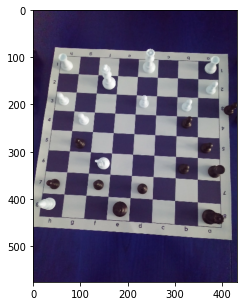

In [335]:
img = cv2.imread('./data/4.jpg')
plt.rcParams["figure.figsize"] = (15,5)
def image_resize(img, height=500):
    pixels = height * height; shape = list(np.shape(img))
    scale = math.sqrt(float(pixels)/float(shape[0]*shape[1]))
    shape[0] *= scale; shape[1] *= scale
    img = cv2.resize(img, (int(shape[1]), int(shape[0])))
    return img

img = image_resize(img)
plt.imshow(img)
plt.show()

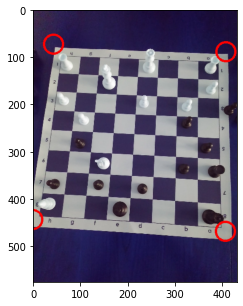

In [336]:
P1 = [[408, 88], [407, 469], [-1, 444], [43, 72]]
img = cv2.circle(img, tuple(board_corners[0]), 20, (255,0,0), 3)
img = cv2.circle(img, tuple(board_corners[1]), 20, (255,0,0), 3)
img = cv2.circle(img, tuple(board_corners[2]), 20, (255,0,0), 3)
img = cv2.circle(img , tuple(board_corners[3]), 20, (255,0,0), 3)
plt.imshow(img)
plt.show()

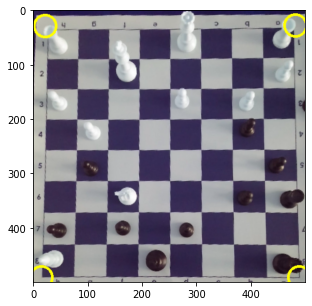

In [350]:

P1 = np.float32([[408, 88], [407, 469], [-1, 444], [43, 72]])

MapP1toP2 = np.float32([[500,0], [500,500] , [0,500], [0,0]])
H = cv2.getPerspectiveTransform(P1, MapP1toP2)
# print(A)

# SHOW WARPED POINTS
warped = cv2.warpPerspective(img, H, (500, 500))
second_board_corners = [[489, 491], [15, 491], [22, 29], [482, 28]]
warped = cv2.circle(warped, tuple(second_board_corners[0]), 20, (255,255,0), 3)
warped = cv2.circle(warped, tuple(second_board_corners[1]), 20, (255,255,0), 3)
warped = cv2.circle(warped, tuple(second_board_corners[2]), 20, (255,255,0), 3)
warped = cv2.circle(warped , tuple(second_board_corners[3]), 20, (255,255,0), 3)
plt.imshow(warped)
plt.show()
# 


[[397 460]
 [ 11 437]
 [ 56  92]
 [394 106]]


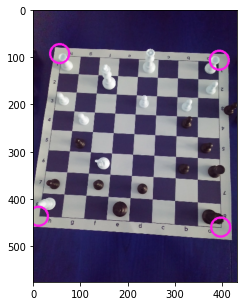

In [347]:
# UNWARP points
H_INV = np.linalg.inv(H)
# unwarp = cv2.warpPerspective(warped, H_INV, (img.shape[1], img.shape[0]))
# plt.imshow(unwarp)
# plt.show()
# print(A_INV.shape)
second_board_cornersM = np.matrix([[489, 491, 1], [15, 491, 1], [22, 29, 1], [482, 28, 1]]).T
# print(second_board_cornersM.shape)
# xhat = H * h
h2 =  H_INV * second_board_cornersM

# We need P2
h2= h2.T
# print(P2)

P2 = np.zeros((4,2))

P2[0,0], P2[0,1] = (h2[0, 0], h2[0, 1]) / h2[0, 2]
P2[1,0], P2[1,1] = (h2[1, 0], h2[1, 1]) / h2[1, 2]
P2[2,0], P2[2,1] = (h2[2, 0], h2[2, 1]) / h2[2, 2]
P2[3,0], P2[3,1] = (h2[3, 0], h2[3, 1]) / h2[3, 2]
P2 = P2.astype(int)
print(P2)
img = cv2.circle(img, tuple((P2[0, 0], P2[0, 1])), 20, (255,25,234), 3)
img = cv2.circle(img, tuple((P2[1, 0], P2[1, 1])), 20, (255,25,234), 3)
img = cv2.circle(img, tuple((P2[2, 0], P2[2, 1])), 20, (255,25,234), 3)
img = cv2.circle(img, tuple((P2[3, 0], P2[3, 1])), 20, (255,25,234), 3)
plt.imshow(img)
plt.show()

[[497   4   6 495]
 [496 496   7   6]
 [  1   1   1   1]]


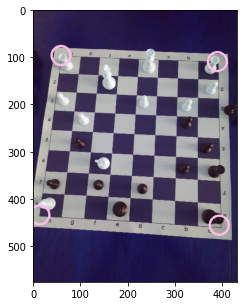

In [389]:
# P3 =  [[497, 496], [4, 496], [6, 7], [495, 6]]
# P2 = P2.reshape(4,-1).astype(np.float32)
P2 = np.float32([[397 ,460], [ 11, 437], [ 56 , 92], [394, 106]])

mapP2toP3 = np.float32([[500,500], [0,500], [0,0], [500,0]])

H2 = cv2.getPerspectiveTransform(P2, mapP2toP3)
third_corners = np.matrix([[497, 496, 1], [4, 496, 1], [6, 7, 1], [495, 6, 1]]).T
print(third_corners)

h3 = np.linalg.inv(H2) * third_corners
h3 = h3.T
P3 = np.zeros((4,2))

P3[0,0], P3[0,1] = (h3[0, 0], h3[0, 1]) / h3[0, 2]
P3[1,0], P3[1,1] = (h3[1, 0], h3[1, 1]) / h3[1, 2]
P3[2,0], P3[2,1] = (h3[2, 0], h3[2, 1]) / h3[2, 2]
P3[3,0], P3[3,1] = (h3[3, 0], h3[3, 1]) / h3[3, 2]
P3 = P3.astype(int)
# print(P3)
img = cv2.circle(img, tuple((P3[0, 0], P3[0, 1])), 20, (255,190,234), 3)
img = cv2.circle(img, tuple((P3[1, 0], P3[1, 1])), 20, (255,190,234), 3)
img = cv2.circle(img, tuple((P3[2, 0], P3[2, 1])), 20, (255,190,234), 3)
img = cv2.circle(img, tuple((P3[3, 0], P3[3, 1])), 20, (255,190,234), 3)
plt.imshow(img)
plt.show()

[[394. 456.]
 [ 14. 434.]
 [ 59.  96.]
 [390. 109.]]
[[500. 500.]
 [  0. 500.]
 [  0.   0.]
 [500.   0.]]


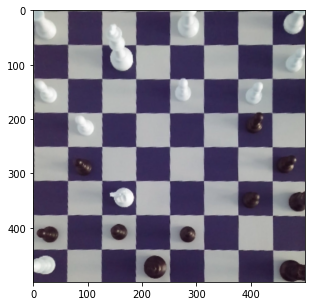

In [349]:
img = cv2.imread('./data/4.jpg')

P3 = np.float32([[394 ,456],[ 14 ,434],[ 59 , 96],[390, 109]])
MapP3toP1 = np.float32([[500,500], [0,500], [0,0], [500,0]])
# P3 = P3.reshape(4,-1).astype(np.float32)
img = image_resize(img)
print(P3)
print(MapP3toP1)
H3 = cv2.getPerspectiveTransform(P3, MapP3toP1)
# print(A)

# SHOW WARPED POINTS
fwarped = cv2.warpPerspective(img, H3, (500, 500))
plt.imshow(fwarped)
plt.show()

First we resize the image for faster processing.
We need to make 2 tensors, P-layers = (LayerNumber (1), Points(4, 2)), so we have all the points for all the layers in a tensor. and P-lucid = (LayerNumber (1), Points(4, 2)) which  contains all points but in the coordinates of the original image.
Next we need a function such that inputting P[0, :, :] will return the map from P0 to P1, where the map should be in the form: MapP1toP2 = np.float32([[500,0], [500,500] , [0,500], [0,0]])
input was P1 = [[408, 88], [407, 469], [-1, 444], [43, 72]]

This allows us to generate the homography matrix H,  H = cv2.getPerspectiveTransform(P1, MapP1toP2), which maps P1 to a 500 x 500 square in which the next points, P2 exist.
So matrix-multiplying any input with H gives the warped output in the 500x500 space:
So H takes points in X1 (our original image/ referece frame) to points in X2

PinX2 = H * PinX1

Now have the points in X2, and we need the points in X thus the formula becomes:

PinX = H.INVERSE * PinX2

Showing these points with drawcircle and plt.showimg() will indeed show us the points originaly in X2 in Xl.
Now we have in total 3 layers thus.


P-in-layer0 = [[408, 88], [407, 469], [-1, 444], [43, 72]]
P-in-layer1 = [[489, 491, 1], [15, 491, 1], [22, 29, 1], [482, 28, 1]]
P-in-layer2 = [[497, 496, 1], [4, 496, 1], [6, 7, 1], [495, 6, 1]]

These are obtained by the chess edge detection algorithm by: X
Next, the function MapPxToPy(Px, Py) outputs:

MapP0ToP1 = [[500,0], [500,500] , [0,500], [0,0]]
MapP1ToP2 = [[500,500], [0,500], [0,0], [500,0]]

Thus we compute:
H0to1 = cv2.getPerspectiveTransform(P-in-layer0, MapP0ToP1)
H1to2 = cv2.getPerspectiveTransform(P-in-layer0, MapP1ToP2)

P-in-layer2 = H1to2 * P-in-layer-1

P-in-layer1 = H1to2.INVERSE * P-in-layer2 

P-in-layer0 = H0to1.INVERSE * P-in-layer1

in total:

Phat-in-layer0 = H0to1.INVERSE * H1to2.INVERSE * P-in-layer2

Which conversts the points in layer2 to layer 0

In [384]:
P_in_layer0 = np.float32([[408, 88], [407, 469], [-1, 444], [43, 72]])
P_in_layer1 = np.float32([[489, 491], [15, 491], [22, 29], [482, 28]])
P_in_layer2 = np.float32([[497, 496], [4, 496], [6, 7], [495, 6]])

MapP0ToP1 = np.float32([[500,0], [500,500] , [0,500], [0,0]])
MapP1ToP2 = np.float32([[500,500], [0,500], [0,0], [500,0]])

H0to1 = cv2.getPerspectiveTransform(P_in_layer0, MapP0ToP1)
H1to2 = cv2.getPerspectiveTransform(P_in_layer1, MapP1ToP2)

# P_in_layer1 = np.float32([[489, 491, 1], [15, 491, 1], [22, 29, 1], [482, 28, 1]])
# P_in_layer2 = np.float32([[497, 496, 1], [4, 496, 1], [6, 7, 1], [495, 6, 1]])

P_in_layer2_modified = np.float32([[497, 496, 1], [4, 496, 1], [6, 7, 1], [495, 6, 1]]).T
# H is a 3x3 matrix thus P must be too, will enlighten this later

print(H0to1)

[[ 1.42073444e+00  1.68043859e-01 -7.31907389e+01]
 [-6.71678518e-02  1.53226662e+00 -1.07434979e+02]
 [ 3.33000833e-05  3.28717196e-04  1.00000000e+00]]


In [376]:
print(H1to2)

[[ 1.09154686e+00  1.65385888e-02 -2.44936501e+01]
 [ 2.42922438e-03  1.11744322e+00 -3.24592962e+01]
 [ 4.85844876e-06  6.60094605e-05  1.00000000e+00]]


In [444]:
# Phat-in-layer0 = H0to1.INVERSE * H1to2.INVERSE * P-in-layer2, np matrix multiplying wont work
X = np.dot(np.linalg.inv(H1to2), P_in_layer2_modified)
Phat = np.dot(np.linalg.inv(H0to1), X)
print(Phat)

[[328.57807481  12.9720302   57.94285133 371.07754438]
 [379.99401444 368.00254262  93.16076182 104.49279164]
 [  0.83077923   0.84735604   0.96499178   0.94879018]]


In [445]:
# All entries in row 2 are scalers for the coordinates, thus we should devide each column by its scaler

for col in Phat.T:
    print(col)
    col /= col[2]


[328.57807481 379.99401444   0.83077923]
[ 12.9720302  368.00254262   0.84735604]
[57.94285133 93.16076182  0.96499178]
[371.07754438 104.49279164   0.94879018]


In [446]:
# These are your output coordinates
Phat = np.delete(Phat, 2, 0)

Phat = Phat.astype(np.int).T
print(Phat)

[[395 457]
 [ 15 434]
 [ 60  96]
 [391 110]]


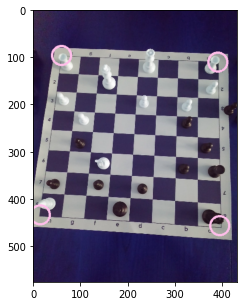

In [447]:

img = cv2.imread('./data/4.jpg')
img = image_resize(img)

img = cv2.circle(img, tuple((Phat[0, 0], Phat[0, 1])), 20, (255,190,234), 3)
img = cv2.circle(img, tuple((Phat[1, 0], Phat[1, 1])), 20, (255,190,234), 3)
img = cv2.circle(img, tuple((Phat[2, 0], Phat[2, 1])), 20, (255,190,234), 3)
img = cv2.circle(img, tuple((Phat[3, 0], Phat[3, 1])), 20, (255,190,234), 3)
plt.imshow(img)
plt.show()

# Now we can project the image from these points
Phat = Phat.astype(np.float32)

print(Phat)
Map_Phat = np.float32([[500,500], [0,500], [0,0], [500,0]])

H_Phat = cv2.getPerspectiveTransform(Phat, Map_Phat)
warped = cv2.warpPerspective(img, H_Phat, (500, 500))

plt.imshow(warped)
plt.show()

In [11]:
a = np.float32([[408, 88], [407, 469], [-1, 444], [43, 72]]).T
b = np.zeros((1,4))
v = np.vstack((a, b))
print(v)

[[408. 407.  -1.  43.]
 [ 88. 469. 444.  72.]
 [  0.   0.   0.   0.]]
